In [203]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

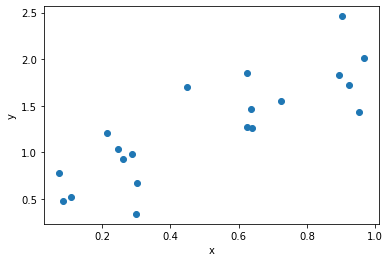

In [204]:
n = 20  # number of data points

# The true intercept and slope for the data if noise isn't present:
alpha_true = 0.5
beta_true = 1.5

# Simulated data:
x_data = np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_data = alpha_true + beta_true*x_data + noise

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

## A linear fit

In [205]:
# A linear fit.

fit = np.polyfit(x_data, y_data, 1)
beta1, beta0 = fit
print('beta: ', beta1)
print('alpha: ', beta0)

beta:  1.495097325167638
alpha:  0.5113267455043463


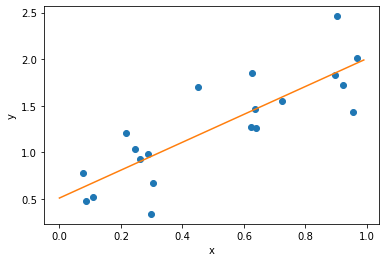

In [206]:
# Plot the data together with the fit.

x_pts = np.arange(0,1,0.01)
y_fit = beta0 + beta1*x_pts

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)

In [207]:
# Calculate r-squared.

def g1(x, beta0, beta1):
    return beta0 + beta1*x

var_unexplained = np.sum((g1(x_data,beta0,beta1)-y_data)**2)/n
var_total = np.var(y_data)
r_squared = 1 - var_unexplained/var_total
print('r-squared: ', r_squared)

r-squared:  0.6907087597616409


## A polynomial fit

In [208]:
# A polynomial fit.

fit = np.polyfit(x_data, y_data, 2)
beta2, beta1, beta0 = fit
print(fit)


[-0.44555545  1.96724888  0.42803486]


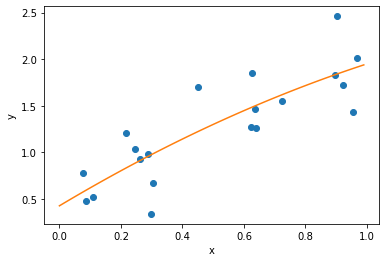

In [209]:
# Plot the data together with the fit.

x_pts = np.arange(0,1,0.01)
y_fit = beta0 + beta1*x_pts + beta2*x_pts**2

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)

In [210]:
# Calculate r-squared.

def g2(x, beta0, beta1, beta2):
    return beta0 + beta1*x + beta2*x**2

var_unexplained = np.sum((g2(x_data,beta0,beta1,beta2)-y_data)**2)/n
var_total = np.var(y_data)
r_squared = 1 - var_unexplained/var_total
print('r-squared: ', r_squared)

r-squared:  0.6939144761911611


# A higher-order polynomial fit

In [211]:
# A polynomial fit.

p = 8
fit = np.polyfit(x_data, y_data, p)
beta_list = fit[::-1]  # flip the list so that it starts with beta0
print(beta_list)


[ 1.64629411e+01 -5.04915723e+02  6.08356090e+03 -3.63416553e+04
  1.20430527e+05 -2.31174494e+05  2.55284686e+05 -1.50311064e+05
  3.65226085e+04]


In [212]:
def g(x, beta_list):
    y = 0
    for p in range(len(beta_list)):
        y = y + beta_list[p]*x**p
        
    return y

(0.0, 3.0)

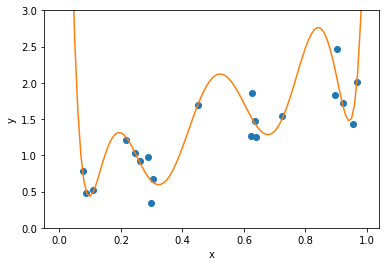

In [213]:
# Plot the data together with the fit.

x_pts = np.arange(0,1,0.01)
#y_fit = beta0 + beta1*x_pts + beta2*x_pts**2
y_fit = g(x_pts, beta_list)

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)
plt.ylim(0,3)

In [214]:
# Calculate r-squared

var_unexplained = np.sum((g(x_data,beta_list)-y_data)**2)/n
var_total = np.var(y_data)
r_squared = 1 - var_unexplained/var_total
print('r-squared: ', r_squared)

r-squared:  0.8844583925925781


# Cross-validation

This is much larger than our earlier r-squared. The problem is, though, that this model is overfitting. To see this, let's split the data into training and testing data.

Text(0, 0.5, 'y')

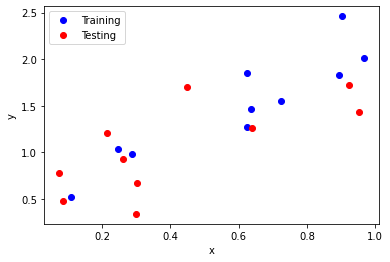

In [215]:
x_train = x_data[:int(n/2)]
x_test = x_data[int(n/2):]
y_train = y_data[:int(n/2)]
y_test = y_data[int(n/2):]

# Plot the two parts of the data
plt.plot(x_train, y_train, 'ob')
plt.plot(x_test, y_test, 'or')
plt.legend(['Training', 'Testing'])
plt.xlabel('x')
plt.ylabel('y')

In [216]:
# A polynomial fit on just the training data 
p = 8
fit = np.polyfit(x_train, y_train, p)
beta_list = fit[::-1]  # flip the list so that it starts with beta0


(0.0, 3.0)

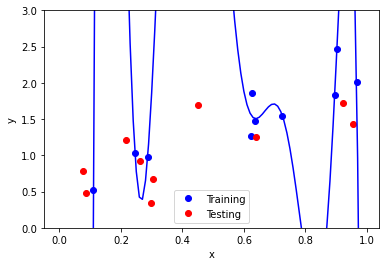

In [217]:
# Plot the data together with the fit.

x_pts = np.arange(0,1,0.01)
#y_fit = beta0 + beta1*x_pts + beta2*x_pts**2
y_fit = g(x_pts, beta_list)

# Plot the two parts of the data
plt.plot(x_train, y_train, 'ob')
plt.plot(x_test, y_test, 'or')
plt.legend(['Training', 'Testing'])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit, 'b')
plt.ylim(0,3)

The above fit does a great job of fitting the training data, but a poor job of fitting the testing data. We can see this by separately calculating $r^2$ for the two sets of data.

In [218]:
# Calculate r-squared for training data:
var_unexplained = np.sum((g(x_train,beta_list)-y_train)**2)/(n/2)
var_total = np.var(y_train)
r_squared = 1 - var_unexplained/var_total
print('Training r-squared: ', r_squared)

# Calculate r-squared for the testing data:
var_unexplained = np.sum((g(x_test,beta_list)-y_test)**2)/(n/2)
var_total = np.var(y_test)
r_squared = 1 - var_unexplained/var_total
print('Testing r-squared: ', r_squared)

Training r-squared:  0.9383435898442211
Testing r-squared:  -2741.793707273514


Let's write a function that does all of this together, i.e. splits data into training and testing sets, fits a polynomial to the training data, plots the fit, and calculates r-squared for both the training and testing data.

In [219]:
def fit(x, y, p, make_plots=True):
    '''
    Given data x and y, split the data into training and testing sets,
    fit a polynomial of degree p to the training data, and return 
    r-squared for both the training and testing data.
    
    Parameters
    --
    x : a 1D array of data
    
    y : a 1D array of data (same size as x)
    
    make_plots : if True, plot the results
    
    Returns
    --
    r_squared_train : r_squared for the training data
    
    r_squared_test : r_squared for the testing data
    '''
    n = len(x)
    
    # Split the data into training and testing sets:
    x_train = x[:int(n/2)]
    x_test = x[int(n/2):]
    y_train = y[:int(n/2)]
    y_test = y[int(n/2):]

    # Fit a polynomial of degree p to the training data:
    fit = np.polyfit(x_train, y_train, p)
    beta_list = fit[::-1]  # flip the list so that it starts with beta0

    # Plot the data together with the fit.
    x_pts = np.arange(0,1,0.01)
    y_fit = g(x_pts, beta_list)

    # Plot the two parts of the data
    if make_plots:
        plt.plot(x_train, y_train, 'ob')
        plt.plot(x_test, y_test, 'or')
        plt.legend(['Training', 'Testing'])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(x_pts, y_fit, 'b')
        plt.ylim(0,3)
    
    # Calculate r-squared for training data:
    var_unexplained = np.sum((g(x_train,beta_list)-y_train)**2)/(n/2)
    var_total = np.var(y_train)
    r_squared_train = 1 - var_unexplained/var_total

    # Calculate r-squared for the testing data:
    var_unexplained = np.sum((g(x_test,beta_list)-y_test)**2)/(n/2)
    var_total = np.var(y_test)
    r_squared_test = 1 - var_unexplained/var_total

    return r_squared_train, r_squared_test


0.8322966228928973 0.26166182427140194


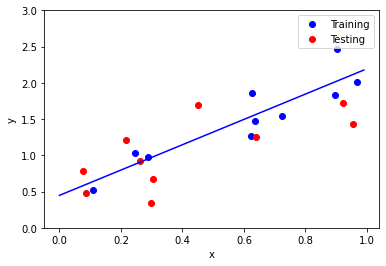

In [220]:
r2train, r2test = fit(x_data, y_data, 1)
print(r2train, r2test)

What is the best value of $p$ to use for our fit? The idea of **cross-validation** is to choose the value that leads to the best performance for the *testing* dataset. Let's calculate the training and testing $r^2$ for different values of $p$ and plot the result.

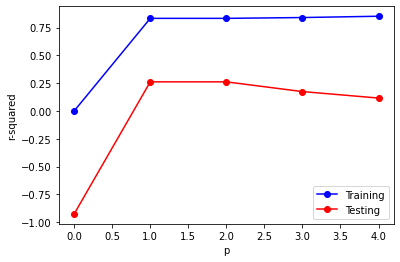

In [221]:
p_max = 4  # maximum degree of polynomial to try

r2train_list = np.zeros(p_max+1)
r2test_list = np.zeros(p_max+1)
for p in range(p_max+1):
    r2train, r2test = fit(x_data, y_data, p, make_plots=False)
    r2train_list[p] = r2train
    r2test_list[p] = r2test
    
plt.plot(r2train_list, '-ob')
plt.plot(r2test_list, '-or')
plt.xlabel('p')
plt.ylabel('r-squared')
plt.legend(['Training', 'Testing'])